In [1]:
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn
#!pip install scipy

# Exploración de datos

In [2]:
import pandas as pd
pd.options.display.float_format = "{:,.2f}".format

import sys
sys.path.append("../")

from src import soporte_preprocesamiento as sp

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("../datos/raw/api_rent_madrid.csv", sep=";")
df.head()

,propertyCode,numPhotos,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,superTopHighlight,topNewDevelopment,externalReference,floor,district,neighborhood,hasLift,parkingSpace,labels,newDevelopmentFinished
0,98903350,33,550.00,chalet,rent,371.00,False,6,3,Numancia de la Sagra,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,91615378,12,750.00,flat,rent,60.00,True,1,1,"Calle de Alejandro Villegas, 23",...,False,False,AV23,3,Hortaleza,Canillas,True,NaN,NaN,NaN
2,88363329,21,750.00,flat,rent,70.00,True,2,1,Gregorio izquierdo,...,False,False,NaN,bj,Centro Urbano,NaN,False,NaN,NaN,NaN
3,98621753,28,400.00,penthouse,rent,67.00,True,2,2,Calle Madrid,...,False,False,90004,2,NaN,NaN,False,NaN,NaN,NaN
4,98222714,22,450.00,flat,rent,89.00,False,2,1,Calle Arroyo,...,False,False,RP1882022101719,2,NaN,NaN,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,NaN


In [4]:
#sp.exploracion_dataframe(df, "price")

In [5]:
df.describe()

,propertyCode,numPhotos,price,size,rooms,bathrooms,distance,priceByArea
count,450.00,450.00,450.00,450.00,450.00,450.00,450.00,432.00
mean,"94,635,146.39",21.90,671.80,68.24,1.70,1.21,"22,455.77",11.86
std,"13,858,169.73",9.67,85.10,35.66,0.97,0.44,"17,001.69",5.36
min,"666,696.00",0.00,340.00,20.00,0.00,1.00,183.00,1.00
25%,"97,564,945.50",15.00,640.00,47.25,1.00,1.00,"7,104.25",8.00
50%,"98,660,320.50",21.00,700.00,62.00,2.00,1.00,"20,294.00",11.00
75%,"98,894,324.25",28.00,740.00,80.00,2.00,1.00,"34,979.75",15.00
max,"98,939,685.00",72.00,750.00,371.00,6.00,3.00,"59,919.00",33.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   propertyCode            450 non-null    int64  
 1   numPhotos               450 non-null    int64  
 2   price                   450 non-null    float64
 3   propertyType            450 non-null    object 
 4   operation               450 non-null    object 
 5   size                    450 non-null    float64
 6   exterior                450 non-null    bool   
 7   rooms                   450 non-null    int64  
 8   bathrooms               450 non-null    int64  
 9   address                 450 non-null    object 
 10  province                450 non-null    object 
 11  municipality            450 non-null    object 
 12  country                 450 non-null    object 
 13  latitude                450 non-null    object 
 14  longitude               450 non-null    ob

In [7]:
df.duplicated().sum()

np.int64(8)

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [9]:
df.columns

Index(['propertyCode', 'numPhotos', 'price', 'propertyType', 'operation',
       'size', 'exterior', 'rooms', 'bathrooms', 'address', 'province',
       'municipality', 'country', 'latitude', 'longitude', 'showAddress',
       'distance', 'description', 'hasVideo', 'status', 'newDevelopment',
       'priceByArea', 'detailedType', 'suggestedTexts', 'hasPlan', 'has3DTour',
       'has360', 'hasStaging', 'superTopHighlight', 'topNewDevelopment',
       'externalReference', 'floor', 'district', 'neighborhood', 'hasLift',
       'parkingSpace', 'labels', 'newDevelopmentFinished'],
      dtype='object')

In [10]:
df.dtypes

propertyCode                int64
numPhotos                   int64
price                     float64
propertyType               object
operation                  object
size                      float64
exterior                     bool
rooms                       int64
bathrooms                   int64
address                    object
province                   object
municipality               object
country                    object
latitude                   object
longitude                  object
showAddress                  bool
distance                    int64
description                object
hasVideo                   object
status                     object
newDevelopment             object
priceByArea               float64
detailedType               object
suggestedTexts             object
hasPlan                    object
has3DTour                  object
has360                     object
hasStaging                 object
superTopHighlight          object
topNewDevelopm

In [11]:
lista = ["propertyCode",
         "numPhotos",
         "description",
         "hasVideo",
         "hasPlan",
         "has3DTour",
         "has360",
         "hasStaging",
         "superTopHighlight",
         "topNewDevelopment",
         "suggestedTexts",
         "externalReference",
         "labels",
         "address",
         "country",
         "latitude",
         "longitude",
         "newDevelopmentFinished",
         "showAddress",
         "detailedType",
         "priceByArea",
         "neighborhood"]
df.drop(columns=lista, inplace=True)
df.reset_index(drop=True, inplace=True)

In [12]:
df.dtypes

price             float64
propertyType       object
operation          object
size              float64
exterior             bool
rooms               int64
bathrooms           int64
province           object
municipality       object
distance            int64
status             object
newDevelopment     object
floor              object
district           object
hasLift            object
parkingSpace       object
dtype: object

# Gestión de las columnas categoricas

In [13]:
df_categoricas = df.select_dtypes("O")
columnas_categoricas = df_categoricas.columns
for columna in columnas_categoricas:
    if any(df[columna].isnull()):
        print(f"------- Unique de {columna} ------- \n\n {df[columna].unique()}\n")

------- Unique de status ------- 

 ['good' nan 'newdevelopment' 'renew']

------- Unique de newDevelopment ------- 

 [False nan True]

------- Unique de floor ------- 

 [nan '3' 'bj' '2' '1' '5' 'en' '4' 'st' '8' '7' '6' '14' 'ss']

------- Unique de district ------- 

 [nan 'Hortaleza' 'Centro Urbano' 'Puente de Vallecas' 'Ciudad Lineal'
 'Casco Antiguo' 'Moncloa' 'Centro' 'Centro - Casco Histórico' 'Retiro'
 'Arganzuela' 'Latina' 'Barrio de Salamanca' 'Bulevar - Plaza Castilla'
 'La Estación' 'Barajas' 'Las Matas- Peñascales'
 'San Roque-Concordia-Adoratrices' 'Chamberí' 'Villaverde'
 'La Dehesa - El Pinar' 'Seseña Nuevo' 'Reyes Católicos' 'Chorrillo'
 'Valdepelayo - Montepinos - Arroyo Culebro' 'Valleaguado - La Cañada'
 'Suroeste' 'San Isidro - Los Almendros' 'San José - Buenos Aires'
 'Hospital' 'Parque de la Coruña - Las Suertes' 'Valderas - Los Castillos'
 'Getafe Centro' 'San Blas' 'Val' 'Casco Urbano' 'Casco Histórico'
 'Los Llanos - Valle Pardo' 'Ensanche' 'Dehesa - El Sot

In [14]:
for columna in columnas_categoricas:
    if any(df_categoricas[columna].isnull()):
        print(f"Modificando: {columna}")
        df[columna].fillna("desconocido", inplace=True)

Modificando: status
Modificando: newDevelopment
Modificando: floor
Modificando: district
Modificando: hasLift
Modificando: parkingSpace


In [15]:
df["province"].isnull().sum()

np.int64(0)

In [16]:
condicion = df["province"] != "Madrid"
df[condicion]["province"] # "No pertenece"
df.drop(index=df[condicion]["province"].index, inplace=True)
df.reset_index(drop=True, inplace=True)
df["province"].unique()

array(['Madrid'], dtype=object)

In [17]:
columnas_categoricas

Index(['propertyType', 'operation', 'province', 'municipality', 'status',
       'newDevelopment', 'floor', 'district', 'hasLift', 'parkingSpace'],
      dtype='object')

In [18]:
df["hasLift"] = df["hasLift"].astype('O')
df["exterior"] = df["exterior"].astype('O')
df["rooms"] = df["rooms"].astype('O')
df["bathrooms"] = df["bathrooms"].astype('O')

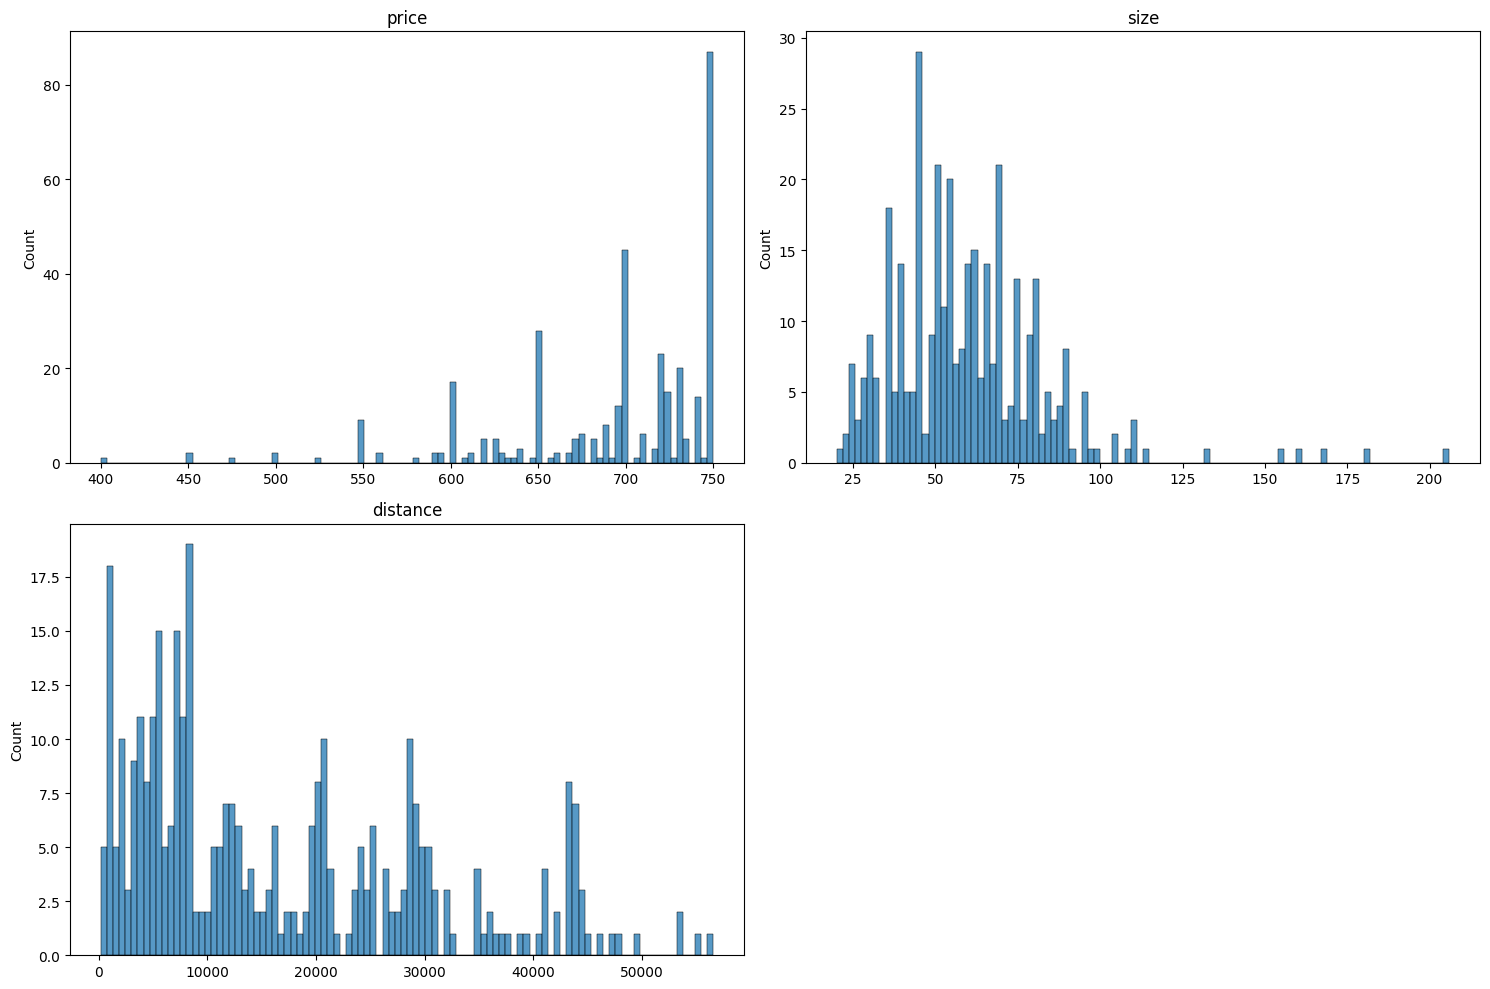

In [19]:
df_numericas, df_categoricas = sp.separar_dataframe(df)
sp.plot_numericas(df)

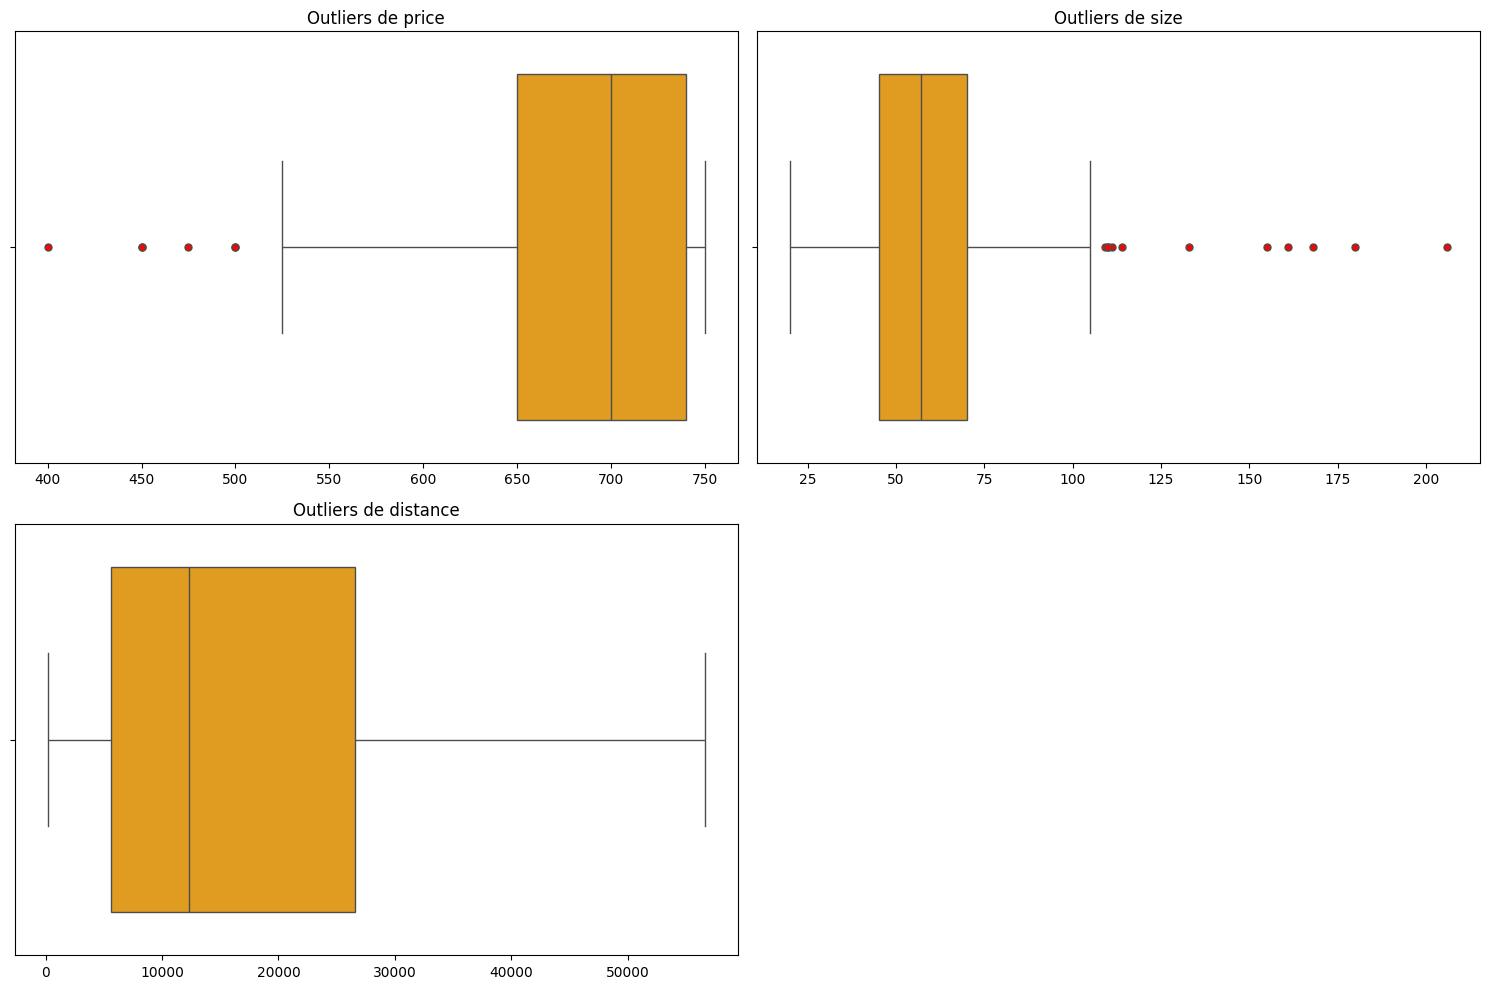

In [20]:
sp.detectar_outliers(df_numericas)

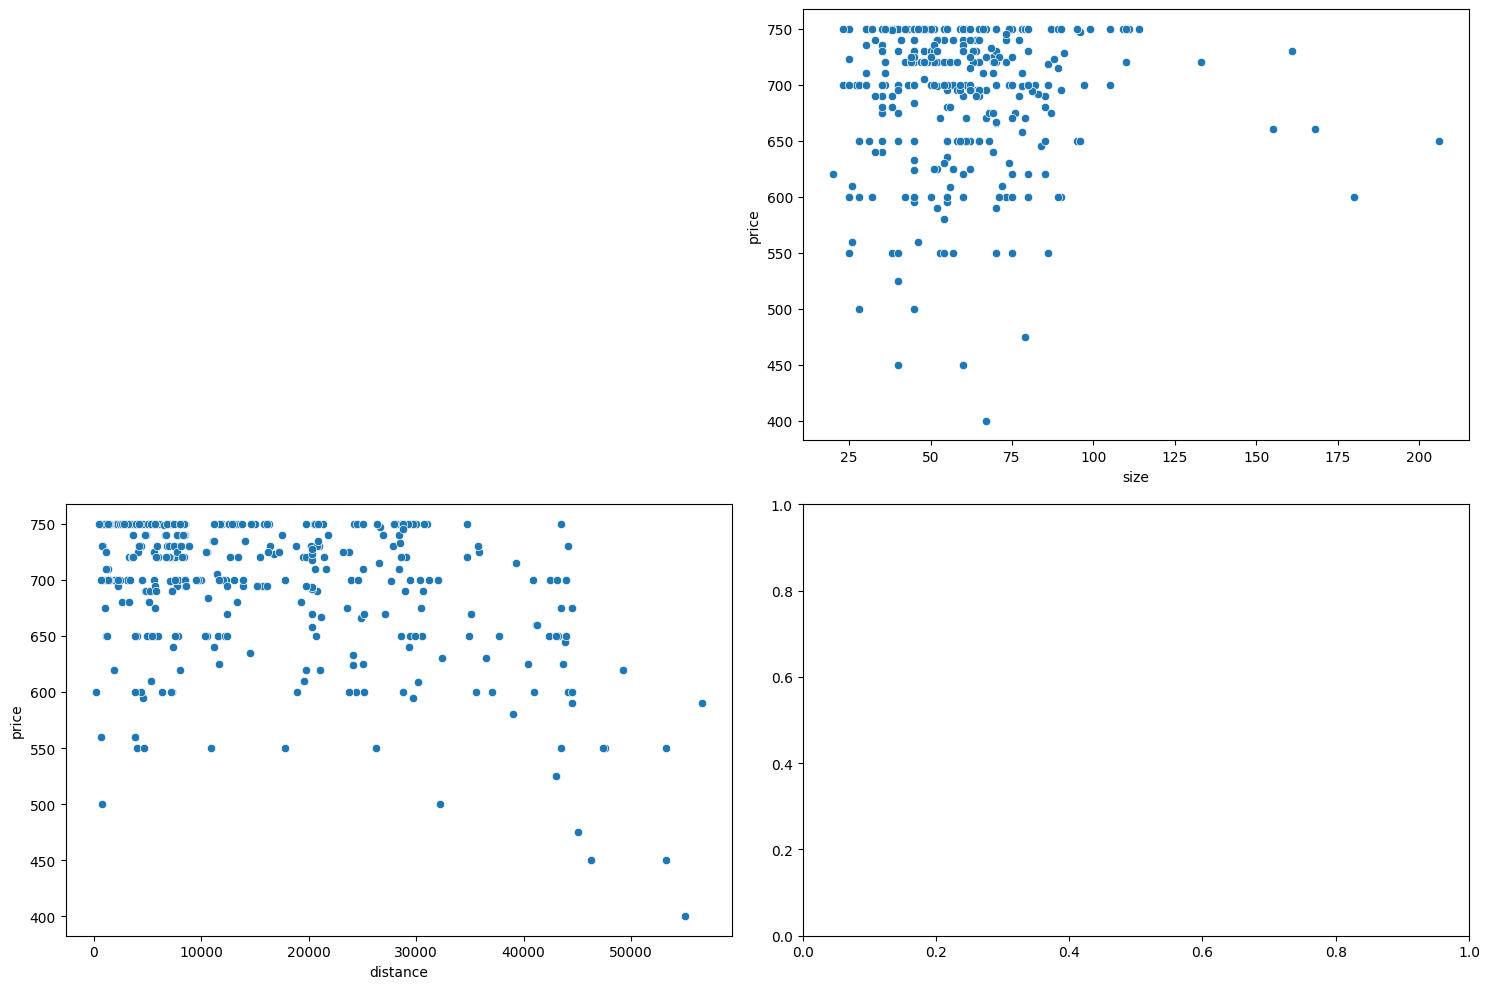

In [21]:
sp.relacion_vr_numericas(df_numericas, "price")

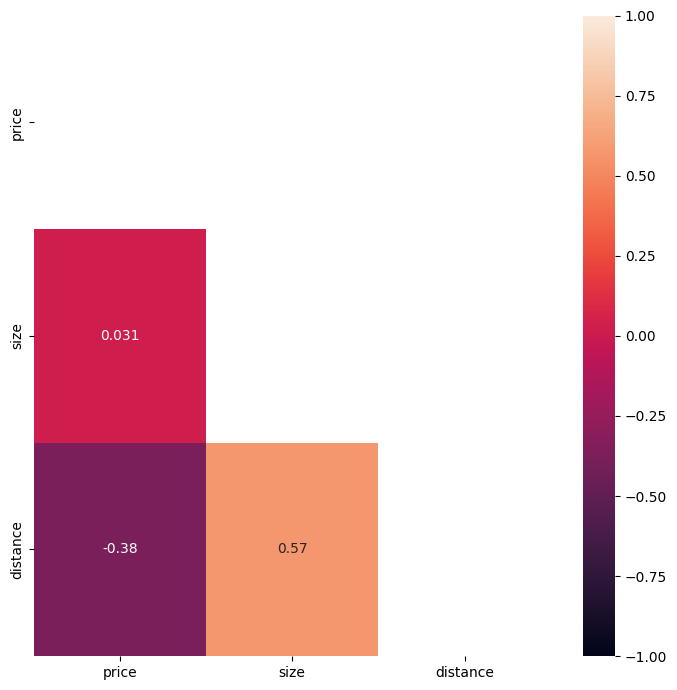

In [22]:
sp.matriz_correlacion(df)

In [23]:
df.to_csv("../datos/output/df_sin_nulos.csv")